In [9]:
import mysql.connector
database = mysql.connector.connect(user='luisforque', password='password', host='localhost', database='dinosaurs')
print(database)
cursor = database.cursor()

In [10]:
import pandas as pd

select_query = "SELECT d.name, d.size, d.discovered, t.type_name, e.era_name, dt.diet_name FROM Dinosaur d \
	LEFT JOIN Type t ON d.type_id = t.type_id \
	LEFT JOIN Era e ON d.era_id = e.era_id \
	LEFT JOIN Country c ON d.country_id = c.country_id \
	LEFT JOIN Diet dt ON d.diet_id = dt.diet_id;"

query_output = pd.read_sql(select_query, database)


/tmp/ipykernel_829/1561161892.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_output = pd.read_sql(select_query, database)


In [11]:
print(query_output)

                 name   size  discovered         type_name          era_name  \
0       yuanmousaurus  17.00        2006          sauropod      mid jurassic   
1         amygdalodon  15.00        1947          sauropod      mid jurassic   
2          segisaurus   1.50        1936    small theropod      mid jurassic   
3        patagosaurus  18.00        1979          sauropod      mid jurassic   
4        megalosaurus   6.00        1827    large theropod      mid jurassic   
..                ...    ...         ...               ...               ...   
311      austrosaurus  15.00        1933          sauropod  early cretaceous   
312    leaellynasaura   2.00        1989  small ornithopod  early cretaceous   
313  sinocalliopteryx   2.37        2007    small theropod  early cretaceous   
314       patagotitan  37.50        2017          sauropod  early cretaceous   
315      becklespinax   5.00        1988    large theropod  early cretaceous   

       diet_name  
0    herbivorous  
1

In [12]:
database.close()

In [37]:
df = query_output

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

array([[<Axes: title={'center': 'discovered'}>]], dtype=object)

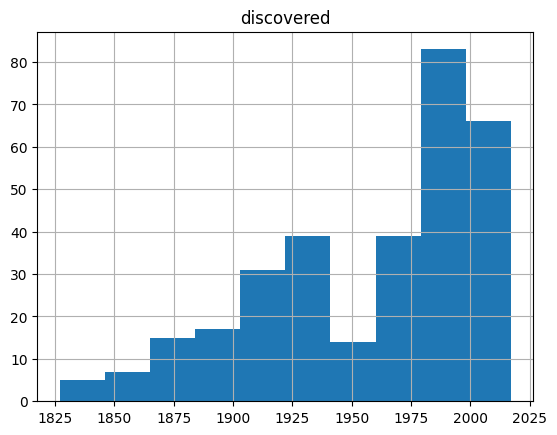

In [39]:
df.hist(column='discovered')


array([[<Axes: title={'center': 'size'}>]], dtype=object)

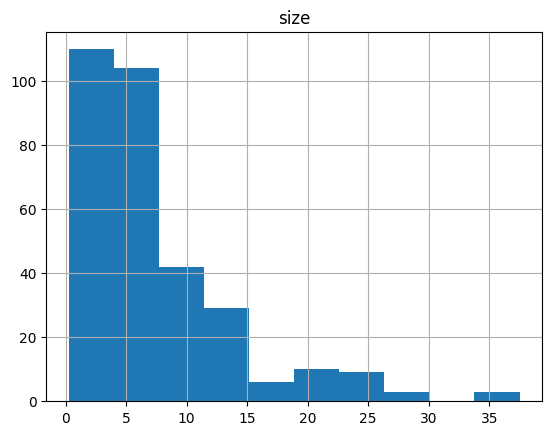

In [40]:
df.hist(column='size')


diet_name
herbivorous                  190
carnivorous                   97
omnivorous                    26
unknown                        2
herbivorous or omnivorous      1
Name: count, dtype: int64


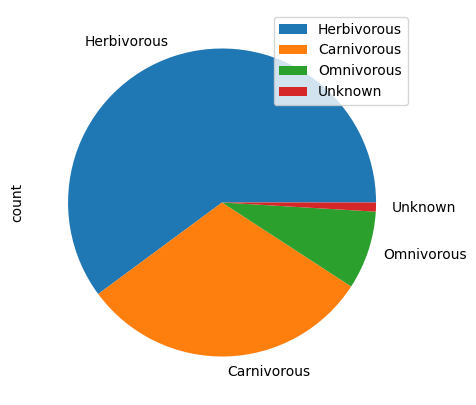

In [41]:

counts = df['diet_name'].value_counts()
print(counts)

df3 = pd.DataFrame({'count': [190, 97 , 26, 3]},
                  index=['Herbivorous', 'Carnivorous', 'Omnivorous', 'Unknown'])
plot = df3.plot.pie(y='count', figsize=(5, 5))

In [42]:
un = df['era_name'].unique()
print(un)
#['mid jurassic' 'late jurassic' 'early jurassic' 'late triassic' 'late cretaceous' 'early cretaceous']
#[   -170mi,        -150mi,          -190mi,          -220mi           -80mi               -120mi]     

['mid jurassic' 'late jurassic' 'early jurassic' 'late triassic'
 'late cretaceous' 'early cretaceous']


In [45]:
def get_age(era):
    if era == 'mid jurassic':
        return -170
    if era == 'late jurassic':
        return -150
    if era == 'early jurassic':
        return -190
    if era == 'early cretaceous':
        return -120
    if era == 'late cretaceous':
        return -80
    if era == 'late triassic':
        return -220
    else:
        return 0

df['era_age'] = df['era_name'].apply(get_age)
print(df)

                 name   size  discovered         type_name          era_name  \
0       yuanmousaurus  17.00        2006          sauropod      mid jurassic   
1         amygdalodon  15.00        1947          sauropod      mid jurassic   
2          segisaurus   1.50        1936    small theropod      mid jurassic   
3        patagosaurus  18.00        1979          sauropod      mid jurassic   
4        megalosaurus   6.00        1827    large theropod      mid jurassic   
..                ...    ...         ...               ...               ...   
311      austrosaurus  15.00        1933          sauropod  early cretaceous   
312    leaellynasaura   2.00        1989  small ornithopod  early cretaceous   
313  sinocalliopteryx   2.37        2007    small theropod  early cretaceous   
314       patagotitan  37.50        2017          sauropod  early cretaceous   
315      becklespinax   5.00        1988    large theropod  early cretaceous   

       diet_name  era_age  
0    herbiv

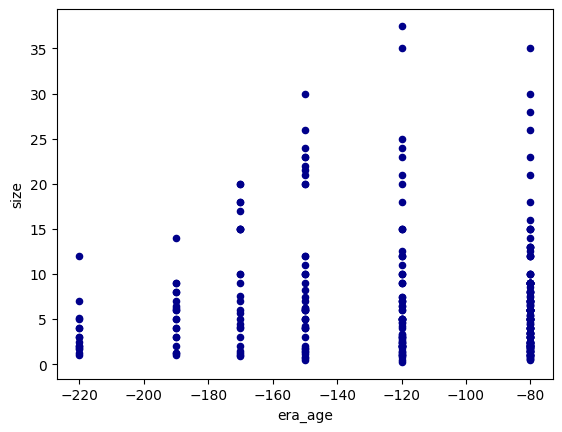

In [46]:
ax1 = df.plot.scatter(x='era_age',
                      y='size',
                      c='DarkBlue')